In [1]:
import os
import random
import fnmatch
import pickle

import numpy as np
np.set_printoptions(formatter={'float_kind':lambda x: "%.4f" % x})

import pandas as pd
pd.set_option('display.width', 300)
pd.set_option('display.float_format', '{:,.4f}'.format)
pd.set_option('display.max_colwidth', 200)

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

print(f'tf.__version__: {tf.__version__}')
print(f'keras.__version__: {tensorflow.keras.__version__}')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import cv2 as cv
from imgaug import augmenters as img_aug
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image


# # gpu 사용
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.4)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

tf.__version__: 2.11.0
keras.__version__: 2.11.0


In [2]:
import os
import tensorflow as tf 
from tensorflow.python.client import device_lib
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
import tensorflow as tf 
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3692066107790875731
xla_global_id: -1
]


In [4]:
import tensorflow as tf

print(f'tf.__version__: {tf.__version__}')

gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.list_physical_devices('GPU') 이 코드도 가능
for gpu in gpus:
    print(gpu)

tf.__version__: 2.11.0


In [5]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
!nvidia-smi

Sun Dec 17 00:40:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.94       Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   38C    P0    52W / 170W |    383MiB / 12288MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
import os
import random
import fnmatch
import pickle

import numpy as np
np.set_printoptions(formatter={'float_kind':lambda x: "%.4f" % x})

import pandas as pd
pd.set_option('display.width', 300)
pd.set_option('display.float_format', '{:,.4f}'.format)
pd.set_option('display.max_colwidth', 200)

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

print(f'tf.__version__: {tf.__version__}')
print(f'keras.__version__: {tensorflow.keras.__version__}')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import cv2 as cv
from imgaug import augmenters as img_aug
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image

tf.__version__: 2.11.0
keras.__version__: 2.11.0


In [8]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [9]:
import os
import random
import fnmatch
import pickle

import numpy as np
np.set_printoptions(formatter={'float_kind':lambda x: "%.4f" % x})

import pandas as pd
pd.set_option('display.width', 300)
pd.set_option('display.float_format', '{:,.4f}'.format)
pd.set_option('display.max_colwidth', 200)

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

print(f'tf.__version__: {tf.__version__}')
print(f'keras.__version__: {tensorflow.keras.__version__}')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import cv2 as cv
from imgaug import augmenters as img_aug
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image

tf.__version__: 2.11.0
keras.__version__: 2.11.0


In [10]:
def load_and_preprocess_data(data_dir):
    file_list = os.listdir(data_dir)
    image_paths = []
    steering_angles = []
    pattern = "*.png"

    for filename in file_list:
        if fnmatch.fnmatch(filename, pattern):
            image_path = os.path.join(data_dir, filename)
            image_paths.append(image_path)
            angle = int(filename[-7:-4])
            steering_angles.append(angle)

    return image_paths, steering_angles

# 데이터 로딩
data_dir = r'.\test'
image_paths, steering_angles = load_and_preprocess_data(data_dir)


4. 데이터 불러오기

imgea_path: .\test\test_00002_090.png
steering_angel: 90


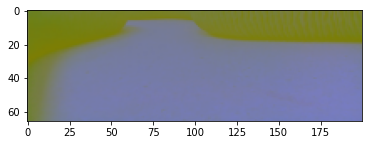

In [18]:
data_dir = r'.\test'
file_list = os.listdir(data_dir)
image_paths = []
steering_angles = []
pattern = "*.png"
for filename in file_list:
    if fnmatch.fnmatch(filename, pattern):
        image_paths.append(os.path.join(data_dir, filename))
        angle = int(filename[-7:-4])
        steering_angles.append(angle)
        
image_index = 2
plt.imshow(Image.open(image_paths[image_index]))
print("imgea_path: %s" % image_paths[image_index])
print("steering_angel: %d" % steering_angles[image_index])


df = pd.DataFrame()
df['ImagePath'] = image_paths
df['Angle'] = steering_angles

5. 조향각의 분포를 확인

(array([3948.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 10133.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        2673.0000]),
 array([45.0000, 48.6000, 52.2000, 55.8000, 59.4000, 63.0000, 66.6000,
        70.2000, 73.8000, 77.4000, 81.0000, 84.6000, 88.2000, 91.8000,
        95.4000, 99.0000, 102.6000, 106.2000, 109.8000, 113.4000, 117.0000,
        120.6000, 124.2000, 127.8000, 131.4000, 135.0000]),
 <BarContainer object of 25 artists>)

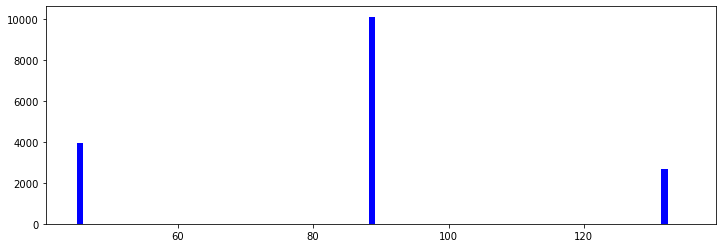

In [19]:
num_of_bins = 25
hist, bins = np.histogram(df['Angle'], num_of_bins)

fig, axes = plt.subplots(1, 1, figsize=(12,4))
axes.hist(df['Angle'], bins=num_of_bins, width=1, color= 'blue')

6. 학습데이터와 검증데이터를 분리

Training data: 13403
Vanlidation data: 3351


Text(0.5, 1.0, 'Val ldat ion Data')

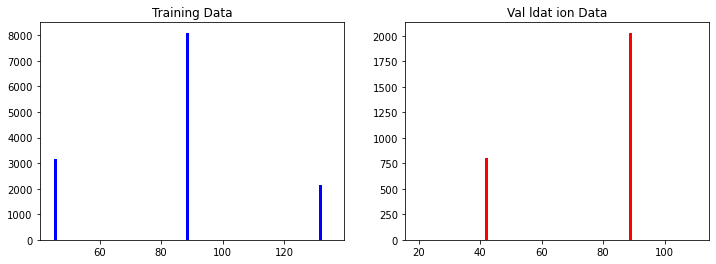

In [20]:
X_train, X_valid, Y_train, Y_valid = train_test_split(image_paths, steering_angles, test_size=0.2)
print("Training data: %d\nVanlidation data: %d" % (len(X_train), len(X_valid)))


fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(Y_train, bins=num_of_bins, width=1, color='blue')
axes[0].set_title('Training Data')
axes[1].hist (Y_valid, bins-num_of_bins, width=1, color='red')
axes[1].set_title('Val ldat ion Data')

Text(0.5, 1.0, 'processed')

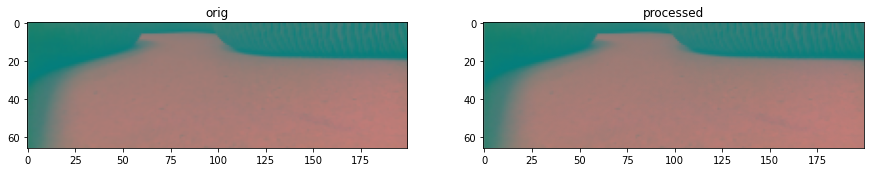

In [21]:
# def my_imread(image_path):
#     image = cv.imread(image_path)
#     return image
# def my_imread(image_path):
#     image = cv.imread(image_path)
#     if image is None:
#         raise FileNotFoundError(f"Image not found at {image_path}")
#     return image

def my_imread(image_path):
    absolute_path = os.path.abspath(image_path)
    image = cv.imread(absolute_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at {absolute_path}")
    return image


def img_preprocess(image) :
    image = image / 255
    return image
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
image_orig = my_imread(image_paths[image_index])
image_processed = img_preprocess(image_orig)
axes[0].imshow(image_orig)
axes[0].set_title("orig")
axes[1].imshow(image_processed)
axes[1].set_title("processed")

In [22]:
def nvidia_model():
    model = Sequential(name='Nvidia_Mode')
    
#     model.add(Conv2D(24, (5,5), strides=(2, 2), input_shape=(66, 200, 3), activation='elu'))
    model.add(Conv2D(24, (5,5), strides=(np.int64(2), np.int64(2)), input_shape=(66, 200, 3), activation='elu'))

    model.add(Conv2D(36, (5,5), strides=(2, 2), activation= 'elu'))
    model.add(Conv2D(48, (5,5), strides=(2,2), activation='elu'))
    model.add(Conv2D(64, (3,3), activation='elu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64,(3, 3), activation='elu'))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='elu'))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(10, activation='elu')) 

    model.add(Dense(1))
    
    optimizer = Adam(lr=1e-3)
    model.compile (loss='mse', optimizer=optimizer)
                 
    return model
model = nvidia_model()
print (model.summary())

Model: "Nvidia_Mode"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 31, 98, 24)        1824      
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_7 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 dropout_2 (Dropout)         (None, 3, 20, 64)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten_1 (Flatten)         (None, 1152)              

9. 학습데이터 생성

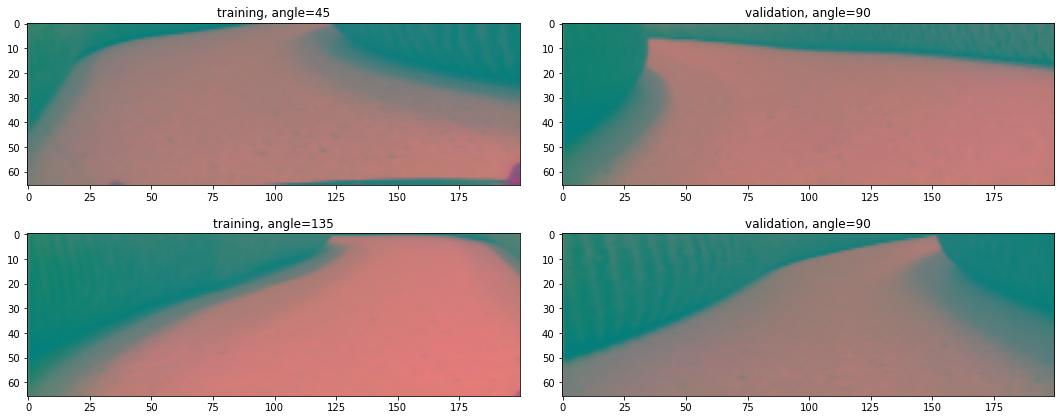

In [23]:
def image_data_generator(image_paths, steering_angles, batch_size):
    while True:
        batch_images = []
        batch_steering_angles = []
        
        for I in range(batch_size):
            random_index = random.randint (0, len(image_paths) - 1)
            image_path = image_paths[random_index]
            image = my_imread(image_paths[random_index])
            steering_angle = steering_angles[random_index]
            
            image = img_preprocess(image)
            batch_images.append(image)
            batch_steering_angles.append(steering_angle)
        yield(np.asarray(batch_images), np.asarray(batch_steering_angles))
                              
ncol = 2
nrow = 2
X_train_batch, y_train_batch = next(image_data_generator(X_train, Y_train, nrow))
X_valid_batch, y_valid_batch = next(image_data_generator(X_valid, Y_valid, nrow))

fig, axes = plt.subplots(nrow, ncol, figsize=(15, 6))
fig.tight_layout() 

for i in range(nrow):
    axes[i][0].imshow(X_train_batch[i])
    axes[i][0].set_title("training, angle=%s" % y_train_batch[i])
    axes[i][1].imshow(X_valid_batch[i])
    axes[i][1].set_title("validation, angle=%s"% y_valid_batch[i])

10. 모델학습(5~10분 가량 소요)

In [25]:
model_output_dir = r"./"

checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath=os.path.join(model_output_dir,'lucky_check.h5'), verbosen=1, save_best_only=True)
history = model.fit_generator(image_data_generator(X_train, Y_train, batch_size=100),steps_per_epoch=300, epochs=200, validation_data = image_data_generator(X_valid, Y_valid, batch_size=100), validation_steps=200, verbose=1, shuffle=1, callbacks=[checkpoint_callback])

model.save(os.path.join(model_output_dir,'lucky_final.h5'))


history_path = os.path.join(model_output_dir, 'history.pickle')
with open(history_path, 'wb') as f:
                            pickle.dump(history.history, f, pickle.HIGHEST_PROTOCOL)

Epoch 1/200
  1/300 [..............................] - ETA: 31s - loss: 498.9463

C:\Users\admin\AppData\Local\Temp/ipykernel_22564/58092376.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(image_data_generator(X_train, Y_train, batch_size=100),steps_per_epoch=300, epochs=200, validation_data = image_data_generator(X_valid, Y_valid, batch_size=100), validation_steps=200, verbose=1, shuffle=1, callbacks=[checkpoint_callback])


300/300 [==============================] - 52s 173ms/step - loss: 432.9323 - val_loss: 426.5727
Epoch 2/200
300/300 [==============================] - 51s 170ms/step - loss: 411.6659 - val_loss: 411.4645
Epoch 3/200
300/300 [==============================] - 51s 171ms/step - loss: 385.2811 - val_loss: 374.7313
Epoch 4/200
300/300 [==============================] - 51s 171ms/step - loss: 350.3099 - val_loss: 354.4847
Epoch 5/200
300/300 [==============================] - 51s 171ms/step - loss: 324.9551 - val_loss: 330.8097
Epoch 6/200
300/300 [==============================] - 51s 171ms/step - loss: 296.3531 - val_loss: 289.5937
Epoch 7/200
300/300 [==============================] - 51s 170ms/step - loss: 270.1433 - val_loss: 283.5545
Epoch 8/200
300/300 [==============================] - 50s 167ms/step - loss: 241.8637 - val_loss: 241.0152
Epoch 9/200
300/300 [==============================] - 50s 166ms/step - loss: 220.2228 - val_loss: 224.6190
Epoch 10/200
300/300 [==================

300/300 [==============================] - 50s 166ms/step - loss: 40.6124 - val_loss: 58.7592
Epoch 78/200
300/300 [==============================] - 50s 166ms/step - loss: 40.2089 - val_loss: 58.6514
Epoch 79/200
300/300 [==============================] - 50s 166ms/step - loss: 38.2259 - val_loss: 61.2186
Epoch 80/200
300/300 [==============================] - 50s 166ms/step - loss: 40.1087 - val_loss: 66.3955
Epoch 81/200
300/300 [==============================] - 50s 166ms/step - loss: 276.9304 - val_loss: 463.3322
Epoch 82/200
300/300 [==============================] - 50s 166ms/step - loss: 449.0734 - val_loss: 425.4329
Epoch 83/200
300/300 [==============================] - 50s 166ms/step - loss: 399.9921 - val_loss: 386.6275
Epoch 84/200
300/300 [==============================] - 50s 167ms/step - loss: 336.9476 - val_loss: 311.4720
Epoch 85/200
300/300 [==============================] - 50s 165ms/step - loss: 282.5214 - val_loss: 250.4854
Epoch 86/200
300/300 [==================

Epoch 153/200
300/300 [==============================] - 49s 165ms/step - loss: 27.5615 - val_loss: 60.6471
Epoch 154/200
300/300 [==============================] - 49s 165ms/step - loss: 29.2727 - val_loss: 63.4717
Epoch 155/200
300/300 [==============================] - 49s 165ms/step - loss: 28.5775 - val_loss: 68.3506
Epoch 156/200
300/300 [==============================] - 50s 165ms/step - loss: 32.6606 - val_loss: 61.8268
Epoch 157/200
300/300 [==============================] - 50s 165ms/step - loss: 28.2692 - val_loss: 61.7270
Epoch 158/200
300/300 [==============================] - 50s 166ms/step - loss: 30.2167 - val_loss: 66.3894
Epoch 159/200
300/300 [==============================] - 50s 166ms/step - loss: 27.4837 - val_loss: 70.4874
Epoch 160/200
300/300 [==============================] - 50s 166ms/step - loss: 28.6335 - val_loss: 62.5863
Epoch 161/200
300/300 [==============================] - 50s 166ms/step - loss: 23.7983 - val_loss: 58.4953
Epoch 162/200
300/300 [=====

11. 결과 확인

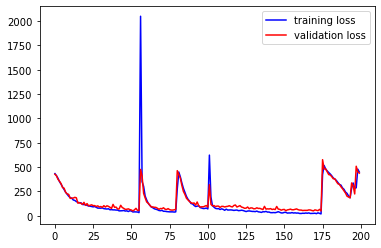

In [26]:
history.history

history_path = os.path.join(model_output_dir, 'history.pickle')
with open(history_path, 'rb') as f:
    history = pickle.load(f)
history
plt.plot(history['loss'], color='blue')
plt.plot(history['val_loss'], color='red')
plt.legend(["training loss", "validation loss"])

12. 검증

4/4 [==============================] - 0s 9ms/step
mse              = 8.6
r_squared = 98.82%



C:\Users\admin\AppData\Local\Temp/ipykernel_22564/1484576454.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[i].set_title(f"actual angle={y_test[i]}, predicted angle={int(y_pred[i])}, diff = {int(y_pred[i])-y_test[1]}")


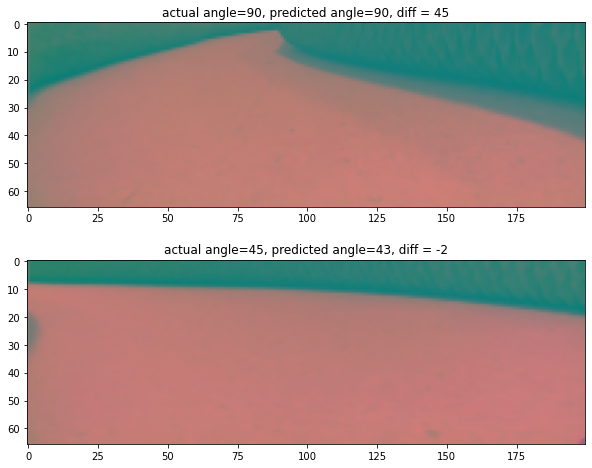

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
def summarize_prediction(Y_true, Y_pred):
    mse = mean_squared_error(Y_true, Y_pred)
    r_squared = r2_score (Y_true, Y_pred)
    print(f'mse              = {mse:.2}')
    print(f'r_squared = {r_squared:.2%}')
    print()

def predict_and_summarize(X, Y):
    model = load_model(f'{model_output_dir}/lucky_check.h5')
    Y_pred = model.predict(X)
    summarize_prediction(Y, Y_pred)
    return Y_pred

n_tests = 100
X_test, y_test = next (image_data_generator(X_valid, Y_valid, 100))
y_pred = predict_and_summarize(X_test, y_test)

n_tests_show = 2
fig, axes = plt.subplots(n_tests_show, 1, figsize=(10, 4 * n_tests_show))
for i in range(n_tests_show): 
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"actual angle={y_test[i]}, predicted angle={int(y_pred[i])}, diff = {int(y_pred[i])-y_test[1]}")